Library

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
# import tensorflow_datasets as tfds
import os
import zipfile
import shutil
import random
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from shutil import copyfile
from tensorflow.keras.preprocessing import image_dataset_from_directory

Load Data

In [2]:

local_zip='./archive.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./')

zip_ref.close()

In [2]:
list_directory=os.listdir('./Vegetable Images')
print(list_directory)

FileNotFoundError: [WinError 3] The system cannot find the path specified: './Vegetable Images'

In [4]:
try:
    os.rename('Vegetable Images', 'dt_vegetables')
except:
    directory = "dt_vegetables"
    
    # Parent Directory 
    parent = "./"
    
    # Path 
    path = os.path.join(parent, directory) 
    shutil.rmtree(path)
    os.rename('Vegetable Images', 'dt_vegetables')

In [2]:
l_directory=os.listdir('./dt_vegetables')
print(l_directory)

['test', 'train', 'validation']


Data Exploration

In [3]:
file_directory='./dt_vegetables/'

for  item in l_directory:
  class_dir = os.path.join(file_directory,item)
  print(item ," : ",len(os.listdir(class_dir)),"File")

test  :  15 File
train  :  15 File
validation  :  15 File


In [4]:
image_directory='./dt_vegetables/train/'
list_dir=os.listdir(image_directory)
for  item in list_dir:
    class_dir = os.path.join(image_directory,item)
    print(item ," : ",len(os.listdir(class_dir)),"File")
  


Bean  :  1000 File
Bitter_Gourd  :  1000 File
Bottle_Gourd  :  1000 File
Brinjal  :  1000 File
Broccoli  :  1000 File
Cabbage  :  1000 File
Capsicum  :  1000 File
Carrot  :  1000 File
Cauliflower  :  1000 File
Cucumber  :  1000 File
Papaya  :  1000 File
Potato  :  1000 File
Pumpkin  :  1000 File
Radish  :  1000 File
Tomato  :  1000 File


In [5]:
image_directory='./dt_vegetables/test/'
list_dir=os.listdir(image_directory)
for  item in list_dir:
    class_dir = os.path.join(image_directory,item)
    print(item ," : ",len(os.listdir(class_dir)),"File")
  

Bean  :  200 File
Bitter_Gourd  :  200 File
Bottle_Gourd  :  200 File
Brinjal  :  200 File
Broccoli  :  200 File
Cabbage  :  200 File
Capsicum  :  200 File
Carrot  :  200 File
Cauliflower  :  200 File
Cucumber  :  200 File
Papaya  :  200 File
Potato  :  200 File
Pumpkin  :  200 File
Radish  :  200 File
Tomato  :  200 File


In [6]:
image_directory='./dt_vegetables/validation/'
list_dir=os.listdir(image_directory)
for  item in list_dir:
    class_dir = os.path.join(image_directory,item)
    print(item ," : ",len(os.listdir(class_dir)),"File")
  

Bean  :  200 File
Bitter_Gourd  :  200 File
Bottle_Gourd  :  200 File
Brinjal  :  200 File
Broccoli  :  200 File
Cabbage  :  200 File
Capsicum  :  200 File
Carrot  :  200 File
Cauliflower  :  200 File
Cucumber  :  200 File
Papaya  :  200 File
Potato  :  200 File
Pumpkin  :  200 File
Radish  :  200 File
Tomato  :  200 File


Bean


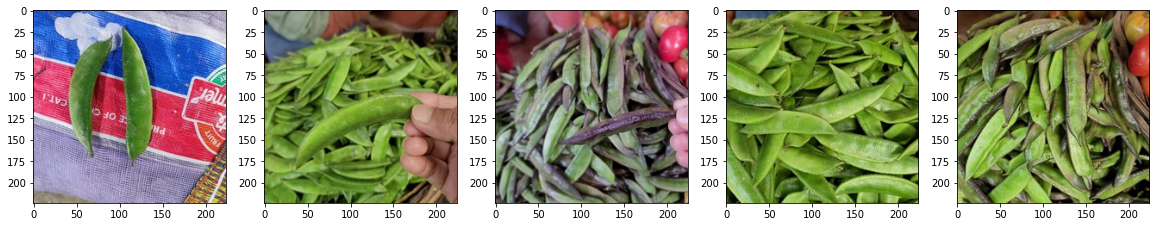

Bitter_Gourd


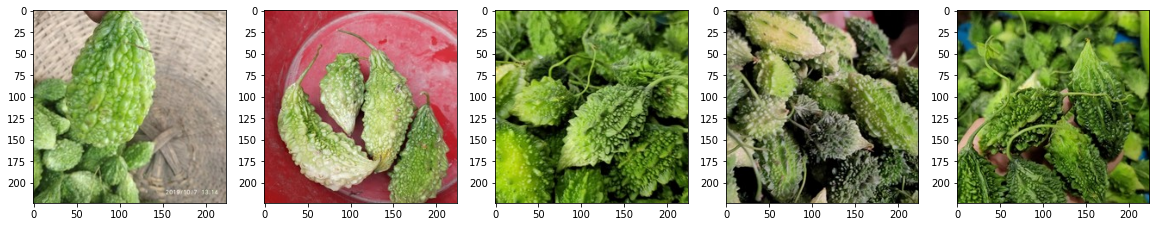

Bottle_Gourd


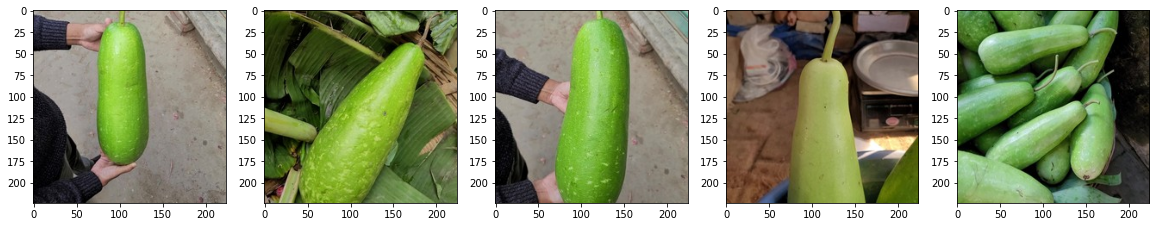

Brinjal


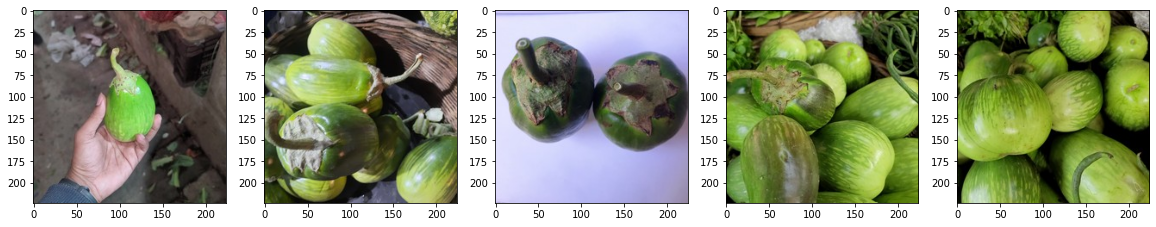

Broccoli


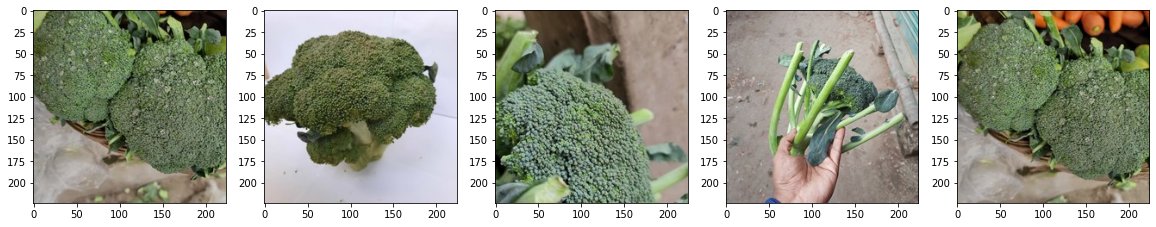

Cabbage


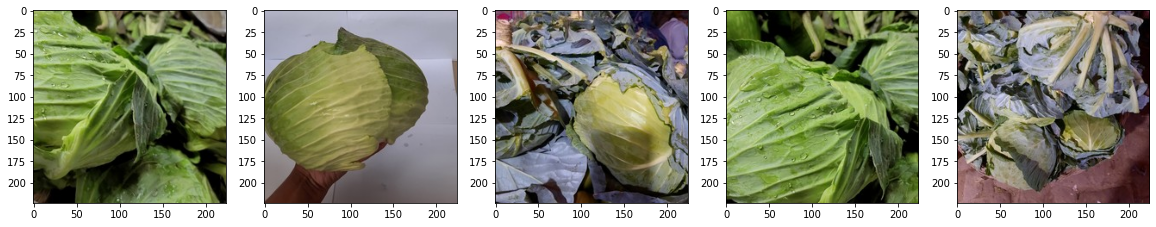

Capsicum


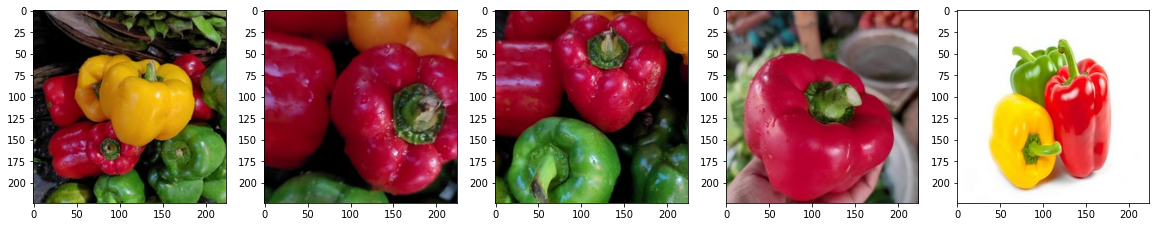

Carrot


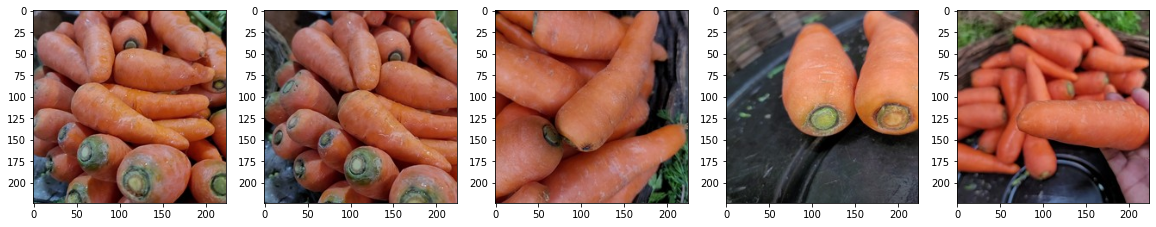

Cauliflower


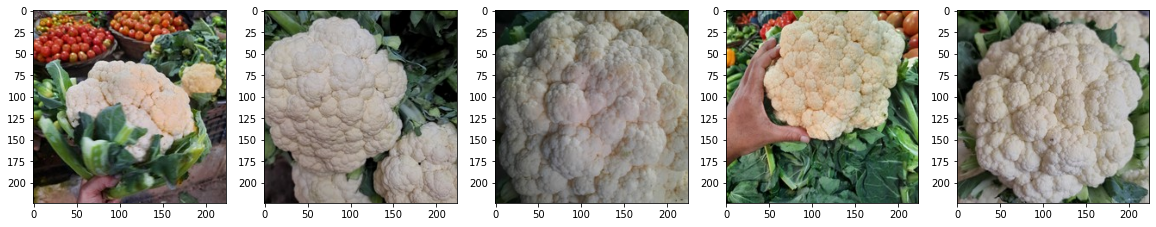

Cucumber


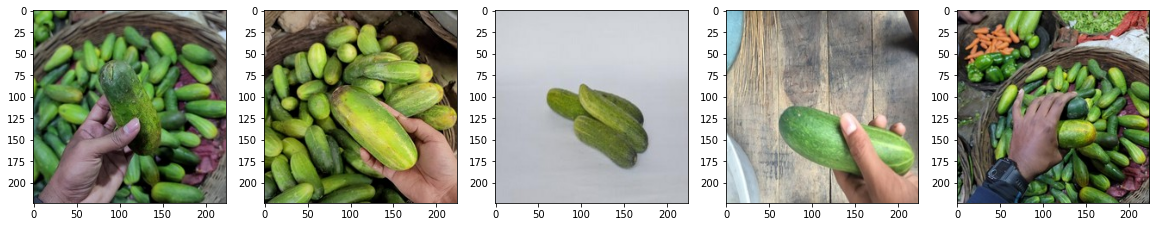

Papaya


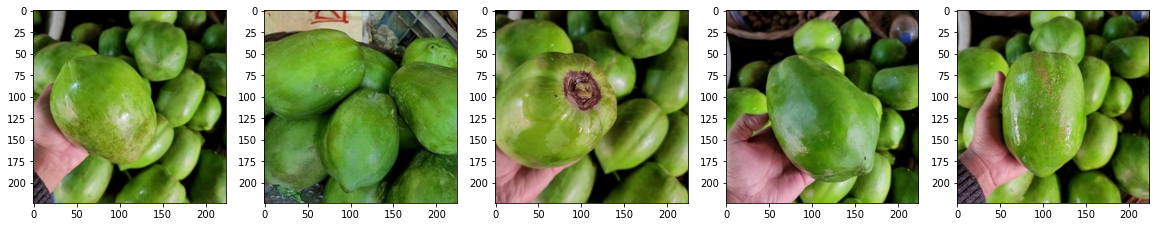

Potato


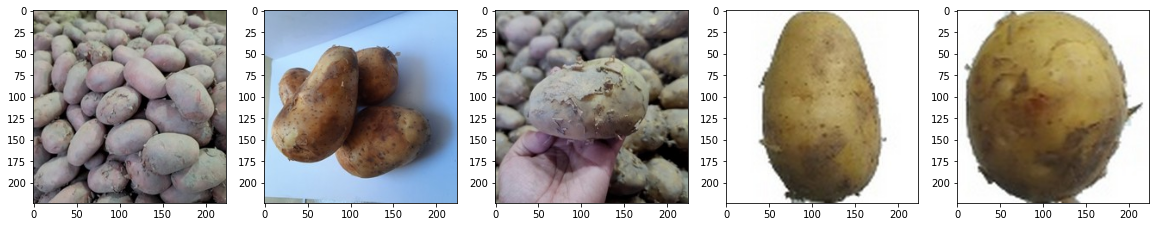

Pumpkin


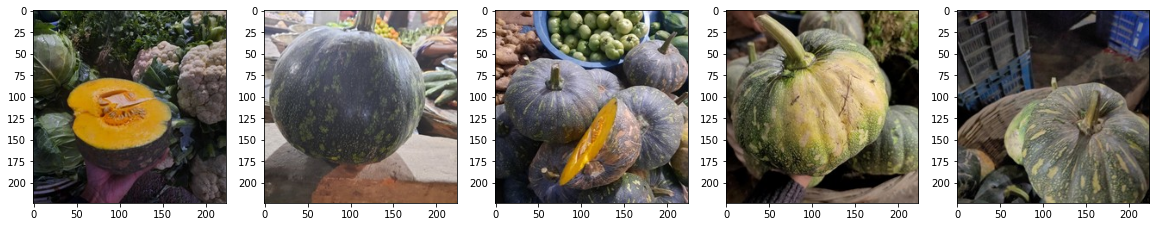

Radish


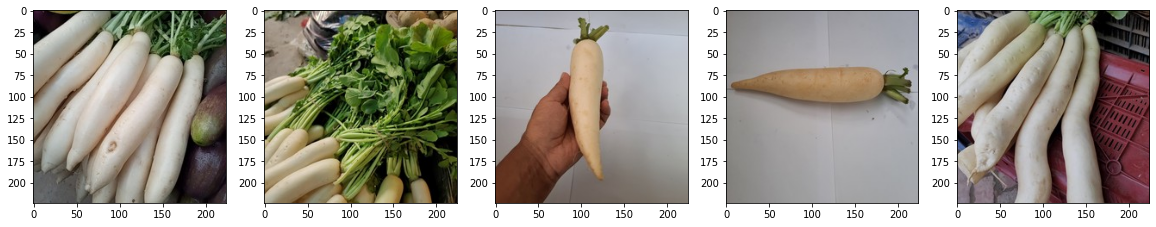

Tomato


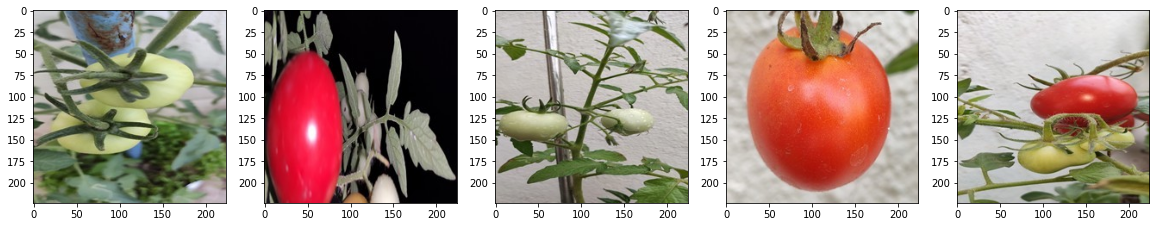

In [7]:
#checking image on directory
for  images in list_dir:
  print(images)
  class_dir = os.path.join(image_directory,images)
  class_images = os.listdir(class_dir)
  plt.figure(figsize=(20, 4))
  for i, img_path in enumerate(class_images[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(class_dir, img_path))
    plt.imshow(img)
  plt.show()

Split Train Data

In [7]:
train_dir = './dt_vegetables/train/'
test_dir = './dt_vegetables/test/'
val_dir = './dt_vegetables/validation/'

In [ ]:
# def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
#   ### START CODE HERE

#   # Instantiate the ImageDataGenerator class (don't forget to set the arguments to augment the images)
#   train_datagen = ImageDataGenerator(rescale=1.0/255.,
#                                      rotation_range=40,
#                                      width_shift_range=0.2,
#                                      height_shift_range=0.2,
#                                      shear_range=0.2,
#                                      zoom_range=0.2,
#                                      horizontal_flip=True,
#                                      fill_mode='nearest')

#   # Pass in the appropriate arguments to the flow_from_directory method
#   train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
#                                                       batch_size=100,
#                                                       class_mode = 'categorical',
                                                      
#                                                       target_size=(150, 150))

#   # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
#   validation_datagen = ImageDataGenerator(rescale=1.0/255.)

#   # Pass in the appropriate arguments to the flow_from_directory method
#   validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
#                                                                 batch_size=100,
#                                                                 class_mode = 'categorical',
                                                                
#                                                                 target_size=(150, 150))
#   ### END CODE HERE
#   return train_generator, validation_generator

In [ ]:

IMAGE_SIZE=(224,224)

# Load training data
train_ds_ = image_dataset_from_directory(
    train_dir,
    label_mode='categorical',
    image_size = IMAGE_SIZE,
    shuffle=True,
    
)

# Load test and validation data
test_ds = image_dataset_from_directory(
    test_dir,
    label_mode='categorical',
    image_size = IMAGE_SIZE,
)

val_ds_ = image_dataset_from_directory(
    val_dir,
    label_mode='categorical',
    image_size = IMAGE_SIZE,
)



Found 15000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.


In [ ]:
print(train_dir)
print(val_ds_)

./dt_vegetables/train/
<BatchDataset shapes: ((None, 224, 224, 3), (None, 15)), types: (tf.float32, tf.float32)>


In [ ]:
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:


# Data Pipeline
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = (
    train_ds_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
val_ds = (
    val_ds_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)



In [ ]:
print(train_ds)
print(val_ds)

<PrefetchDataset shapes: ((None, 224, 224, 3), (None, 15)), types: (tf.float32, tf.float32)>
<PrefetchDataset shapes: ((None, 224, 224, 3), (None, 15)), types: (tf.float32, tf.float32)>


In [ ]:
model = tf.keras.models.Sequential([
    # Preprocessing
    preprocessing.RandomFlip('horizontal'), # flip left-to-right
    preprocessing.RandomContrast(0.5), # contrast change by up to 50%
    
    
    # Block One
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same',
                  input_shape=[224, 224, 3]),
    tf.keras.layers.MaxPool2D(),

    # Block Two
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(),

    # Block Three
    tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same', input_shape=[224, 224, 3]),
    tf.keras.layers.MaxPool2D(),

    
    # Head
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(15, activation='sigmoid'),
])

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    # YOUR CODE HERE: Add loss and metric
    loss= tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy'],
)

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
)

Epoch 1/10
469/469 [==============================] - 1650s 3s/step - loss: 2.3514 - accuracy: 0.2303 - val_loss: 1.9396 - val_accuracy: 0.3557
Epoch 2/10
469/469 [==============================] - 1572s 3s/step - loss: 1.7726 - accuracy: 0.4290 - val_loss: 1.2658 - val_accuracy: 0.5847
Epoch 3/10
469/469 [==============================] - 1570s 3s/step - loss: 1.1439 - accuracy: 0.6389 - val_loss: 0.8343 - val_accuracy: 0.7363
Epoch 4/10
469/469 [==============================] - 1598s 3s/step - loss: 0.7094 - accuracy: 0.7738 - val_loss: 0.6124 - val_accuracy: 0.8103
Epoch 5/10
469/469 [==============================] - 1553s 3s/step - loss: 0.5071 - accuracy: 0.8434 - val_loss: 0.7018 - val_accuracy: 0.7860
Epoch 6/10
469/469 [==============================] - 1815s 4s/step - loss: 0.3647 - accuracy: 0.8869 - val_loss: 0.6489 - val_accuracy: 0.8000
Epoch 7/10
469/469 [==============================] - 2085s 4s/step - loss: 0.2905 - accuracy: 0.9093 - val_loss: 0.5522 - val_accuracy:

In [ ]:
# model.save('model_inceptionV3_epoch5.h5')

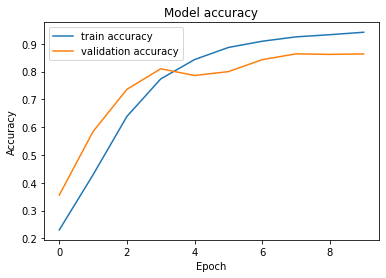

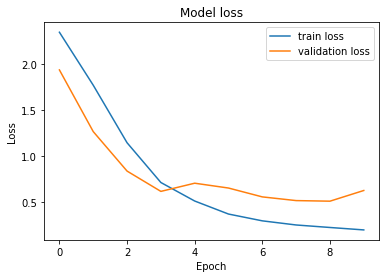

In [ ]:
def plot_accuracy(history):
    
    plt.plot(history.history['accuracy'],label='train accuracy')
    plt.plot(history.history['val_accuracy'],label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Accuracy_v1_InceptionV3')
    plt.show()
    
def plot_loss(history):
    
    plt.plot(history.history['loss'],label="train loss")
    plt.plot(history.history['val_loss'],label="validation loss")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Loss_v1_InceptionV3')
    plt.show()
    
plot_accuracy(history)
plot_loss(history)

In [ ]:
prediksi = model.predict()

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Activation, Flatten, MaxPool2D
from tensorflow.keras.layers.experimental import preprocessing


In [9]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  ### START CODE HERE

  # Instantiate the ImageDataGenerator class (don't forget to set the arguments to augment the images)
  train_datagen = ImageDataGenerator(rescale=1.0/255.,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=100,
                                                      class_mode = 'categorical',
                                                      
                                                      target_size=(150, 150))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1.0/255.)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=100,
                                                                class_mode = 'categorical',
                                                                
                                                                target_size=(150, 150))
  ### END CODE HERE
  return train_generator, validation_generator

In [11]:
# Test your generators
training_direct='./dt_vegetables/train/'
testing_direct='./dt_vegetables/validation/'

train_generator, validation_generator = train_val_generators(training_direct, testing_direct)

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [18]:
def create_model2():
  # DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
  # USE AT LEAST 3 CONVOLUTION LAYERS

  ### START CODE HERE

  model2 = tf.keras.models.Sequential([ 
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),  
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),  
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(15, activation='softmax') 
  ])

  
  model2.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy']) 
    
  ### END CODE HERE

  return model2

In [19]:
# Get the untrained model
model2 = create_model2()
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 17, 17, 128)     

In [20]:
# Train the model
# Note that this may take some time.
history = model2.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/15
150/150 [==============================] - 649s 4s/step - loss: 0.2309 - accuracy: 0.2714 - val_loss: 0.1309 - val_accuracy: 0.5900
Epoch 2/15
150/150 [==============================] - 323s 2s/step - loss: 0.1417 - accuracy: 0.5406 - val_loss: 0.1226 - val_accuracy: 0.6377
Epoch 3/15
150/150 [==============================] - 321s 2s/step - loss: 0.1057 - accuracy: 0.6789 - val_loss: 0.0887 - val_accuracy: 0.7407
Epoch 4/15
150/150 [==============================] - 320s 2s/step - loss: 0.0812 - accuracy: 0.7672 - val_loss: 0.0660 - val_accuracy: 0.8180
Epoch 5/15
150/150 [==============================] - 321s 2s/step - loss: 0.0639 - accuracy: 0.8199 - val_loss: 0.0344 - val_accuracy: 0.9083
Epoch 6/15
150/150 [==============================] - 321s 2s/step - loss: 0.0547 - accuracy: 0.8521 - val_loss: 0.0416 - val_accuracy: 0.8957
Epoch 7/15
150/150 [==============================] - 325s 2s/step - loss: 0.0444 - accuracy: 0.8815 - val_loss: 0.0380 - val_accuracy: 0.9030

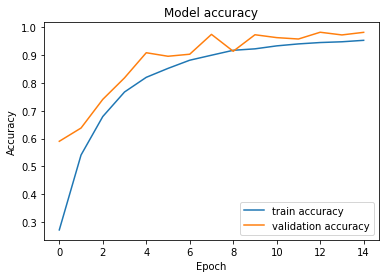

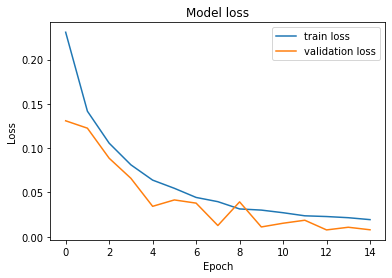

In [21]:
def plot_accuracy(history):
    
    plt.plot(history.history['accuracy'],label='train accuracy')
    plt.plot(history.history['val_accuracy'],label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Accuracy_v1_InceptionV3')
    plt.show()
    
def plot_loss(history):
    
    plt.plot(history.history['loss'],label="train loss")
    plt.plot(history.history['val_loss'],label="validation loss")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Loss_v1_InceptionV3')
    plt.show()
    
plot_accuracy(history)
plot_loss(history)

Save Model 1

In [58]:
export_dir1 = './SaveModel1'
tf.saved_model.save(model2, export_dir1)

INFO:tensorflow:Assets written to: ./SaveModel1\assets


Convert the SavedModel to TFLite

In [59]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir1)
tflite_model = converter.convert()

In [60]:
import pathlib
tflite_model_file = pathlib.Path('model1.tflite')
tflite_model_file.write_bytes(tflite_model)

76679480

In [26]:
# Library Evaluation 
import shutil
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [23]:
y_test = validation_generator.classes
y_pred = model2.predict_generator(validation_generator)
y_pred = tf.argmax(y_pred, axis=1)

C:\Users\bryli\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


In [12]:
labels = []
for label in train_generator.class_indices:
  labels.append(label)
num_labels = len(labels)

print("Labels: {}".format(labels))

NameError: name 'train_generator' is not defined

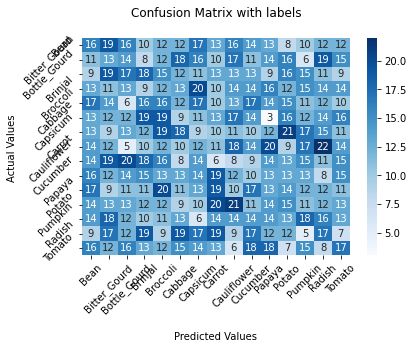

In [26]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(labels, rotation=45)
ax.yaxis.set_ticklabels(labels, rotation=45)

## Display the visualization of the Confusion Matrix.
plt.show()

[[1.0000000e+00 1.2293058e-11 1.4545386e-12 7.8746707e-09 2.2400916e-11
  5.0323596e-18 2.4962061e-15 6.9492889e-10 6.8096922e-14 1.5747320e-10
  2.6104862e-17 2.3869138e-18 2.0076171e-16 8.3252470e-16 8.0732285e-13]]
Bean


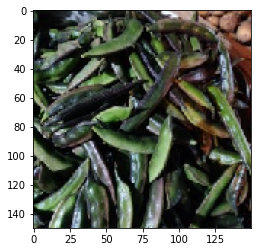

In [47]:
# Mencoba prediksi
# from google.colab import files
from keras.preprocessing import image
 
uploaded = './dt_vegetables/test/Bean/0642.jpg'
 
img = image.load_img(uploaded, target_size=(150,150))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
classes = model2.predict(images, batch_size=100) # the value is not always 1 and 0 because of probabilities
predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities
print(classes)

if predicted_class_indices == 0:
  print('Bean')
elif predicted_class_indices == 1:
  print('Bitter_Gourd')
elif predicted_class_indices == 2:
  print('Bottle_Gourd')
elif predicted_class_indices == 3:
  print('Brinjal')
elif predicted_class_indices == 4:
  print('Broccoli')
# elif predicted_class_indices == 4:
#   print('kangkung')
elif predicted_class_indices == 5:
  print('Cabbage')
elif predicted_class_indices == 6:
  print('Capsicum')
elif predicted_class_indices == 7:
  print('Carrot')
elif predicted_class_indices == 8:
  print('Cauliflower')
elif predicted_class_indices ==  9:
  print('Cucumber')
elif predicted_class_indices == 10:
  print('Papaya')
elif predicted_class_indices == 11:
  print('Potato')
elif predicted_class_indices == 12:
  print('Pumpkin')
elif predicted_class_indices == 13:
  print('Radish')
elif predicted_class_indices == 14:
  print('Tomato')
else:
  print('???')

Mencoba cara baru

In [18]:
def train_val_generators2(TRAINING_DIR, VALIDATION_DIR):
  ### START CODE HERE

  # Instantiate the ImageDataGenerator class (don't forget to set the arguments to augment the images)
  train_datagen = ImageDataGenerator(rescale=1.0/255.,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator2 = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=100,
                                                      class_mode = 'categorical',                                                     
                                                      target_size=(150, 150))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1.0/255.)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator2 = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=100,
                                                                class_mode = 'categorical',
                                                                shuffle=False,
                                                                target_size=(150, 150))
  ### END CODE HERE
  return train_generator2, validation_generator2

In [19]:
# Test your generators
training_direct='./dt_vegetables/train/'
testing_direct='./dt_vegetables/validation/'

train_generator2, validation_generator2 = train_val_generators2(training_direct, testing_direct)

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [50]:
def create_model3():
  # DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
  # USE AT LEAST 3 CONVOLUTION LAYERS

  ### START CODE HERE

  model3 = tf.keras.models.Sequential([ 
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),  
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),  
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(15, activation='softmax') 
  ])

  
  model3.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy']) 
    
  ### END CODE HERE

  return model3

In [51]:
# Get the untrained model
model3 = create_model2() #Salah manggil tapi bagus hasilnya
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 17, 17, 128)     

C:\Users\bryli\AppData\Roaming\Python\Python37\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [52]:
# Train the model
# Note that this may take some time.
history3 = model3.fit(train_generator2,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator2)

Epoch 1/15
150/150 [==============================] - 666s 4s/step - loss: 0.2187 - accuracy: 0.3065 - val_loss: 0.1555 - val_accuracy: 0.4967
Epoch 2/15
150/150 [==============================] - 380s 3s/step - loss: 0.1326 - accuracy: 0.5747 - val_loss: 0.0865 - val_accuracy: 0.7403
Epoch 3/15
150/150 [==============================] - 597s 4s/step - loss: 0.0950 - accuracy: 0.7209 - val_loss: 0.0686 - val_accuracy: 0.8103
Epoch 4/15
150/150 [==============================] - 494s 3s/step - loss: 0.0697 - accuracy: 0.8029 - val_loss: 0.0646 - val_accuracy: 0.8193
Epoch 5/15
150/150 [==============================] - 451s 3s/step - loss: 0.0549 - accuracy: 0.8499 - val_loss: 0.0282 - val_accuracy: 0.9393
Epoch 6/15
150/150 [==============================] - 477s 3s/step - loss: 0.0446 - accuracy: 0.8859 - val_loss: 0.0666 - val_accuracy: 0.8470
Epoch 7/15
150/150 [==============================] - 491s 3s/step - loss: 0.0382 - accuracy: 0.9007 - val_loss: 0.0428 - val_accuracy: 0.9053

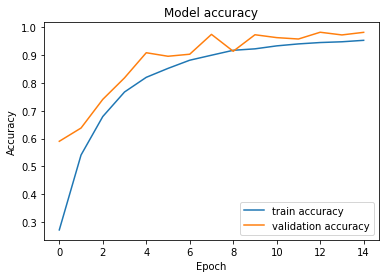

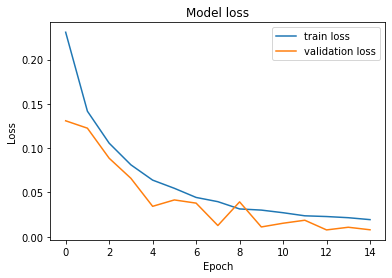

In [53]:
def plot_accuracy(history):
    
    plt.plot(history.history['accuracy'],label='train accuracy')
    plt.plot(history.history['val_accuracy'],label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Accuracy_v1_InceptionV3')
    plt.show()
    
def plot_loss(history):
    
    plt.plot(history.history['loss'],label="train loss")
    plt.plot(history.history['val_loss'],label="validation loss")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Loss_v1_InceptionV3')
    plt.show()
    
plot_accuracy(history)
plot_loss(history)

Save Model 2

In [61]:
export_dir2 = './SaveModel2'
tf.saved_model.save(model3, export_dir2)

INFO:tensorflow:Assets written to: ./SaveModel2\assets


INFO:tensorflow:Assets written to: ./SaveModel2\assets


In [62]:
# Convert the model.
converte2 = tf.lite.TFLiteConverter.from_saved_model(export_dir2)
tflite_mode2 = converte2.convert()

In [63]:
tflite_model_file2 = pathlib.Path('model2.tflite')
tflite_model_file2.write_bytes(tflite_mode2)

76679480

In [54]:
y_test2 = validation_generator2.classes
y_pred2 = model3.predict_generator(validation_generator2)
y_pred2 = tf.argmax(y_pred2, axis=1)

C:\Users\bryli\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


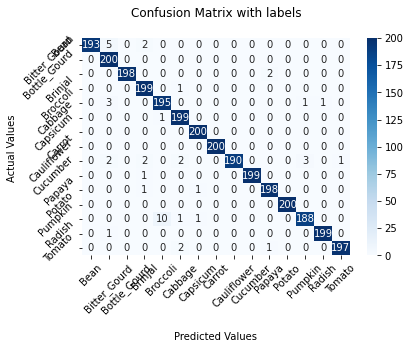

In [55]:
cf_matrix2 = confusion_matrix(y_test2, y_pred2)

ax2 = sns.heatmap(cf_matrix2, annot=True, fmt='g', cmap='Blues')

ax2.set_title('Confusion Matrix with labels\n');
ax2.set_xlabel('\nPredicted Values')
ax2.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax2.xaxis.set_ticklabels(labels, rotation=45)
ax2.yaxis.set_ticklabels(labels, rotation=45)

## Display the visualization of the Confusion Matrix.
plt.show()

In [64]:
print(train_generator2.class_indices)
print()
print(classification_report(y_test2, y_pred2))

{'Bean': 0, 'Bitter_Gourd': 1, 'Bottle_Gourd': 2, 'Brinjal': 3, 'Broccoli': 4, 'Cabbage': 5, 'Capsicum': 6, 'Carrot': 7, 'Cauliflower': 8, 'Cucumber': 9, 'Papaya': 10, 'Potato': 11, 'Pumpkin': 12, 'Radish': 13, 'Tomato': 14}

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       200
           1       0.95      1.00      0.97       200
           2       1.00      0.99      0.99       200
           3       0.97      0.99      0.98       200
           4       0.95      0.97      0.96       200
           5       0.97      0.99      0.98       200
           6       0.99      1.00      1.00       200
           7       1.00      1.00      1.00       200
           8       1.00      0.95      0.97       200
           9       1.00      0.99      1.00       200
          10       0.99      0.99      0.99       200
          11       1.00      1.00      1.00       200
          12       0.98      0.94      0.96       200
          13     

[[9.9992633e-01 4.0272724e-05 4.1098374e-09 3.5406840e-06 2.1454750e-07
  1.1890445e-07 7.9957157e-15 8.4107882e-08 9.6926511e-09 1.1407842e-05
  3.0072207e-14 6.0700338e-12 3.0922498e-12 2.5022228e-12 1.8018671e-05]]
Bean


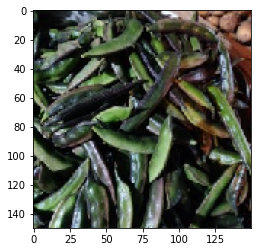

In [56]:
# Mencoba prediksi
# from google.colab import files
from keras.preprocessing import image
 
uploaded = './dt_vegetables/test/Bean/0642.jpg'
 
img = image.load_img(uploaded, target_size=(150,150))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
classes = model3.predict(images, batch_size=100) # the value is not always 1 and 0 because of probabilities
predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities
print(classes)

if predicted_class_indices == 0:
  print('Bean')
elif predicted_class_indices == 1:
  print('Bitter_Gourd')
elif predicted_class_indices == 2:
  print('Bottle_Gourd')
elif predicted_class_indices == 3:
  print('Brinjal')
elif predicted_class_indices == 4:
  print('Broccoli')
# elif predicted_class_indices == 4:
#   print('kangkung')
elif predicted_class_indices == 5:
  print('Cabbage')
elif predicted_class_indices == 6:
  print('Capsicum')
elif predicted_class_indices == 7:
  print('Carrot')
elif predicted_class_indices == 8:
  print('Cauliflower')
elif predicted_class_indices ==  9:
  print('Cucumber')
elif predicted_class_indices == 10:
  print('Papaya')
elif predicted_class_indices == 11:
  print('Potato')
elif predicted_class_indices == 12:
  print('Pumpkin')
elif predicted_class_indices == 13:
  print('Radish')
elif predicted_class_indices == 14:
  print('Tomato')
else:
  print('???')

Model baru

In [14]:
from tensorflow.keras.applications import ResNet50    # underfit
from tensorflow.keras.applications import ResNet152V2 # overfit  Jelek semua
def create_model4():
  # DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
  # USE AT LEAST 3 CONVOLUTION LAYERS

  ### START CODE HERE

  model4 = tf.keras.models.Sequential([ 
    ResNet50(weights="imagenet", include_top=False, input_tensor=tf.keras.layers.Input(shape=(150, 150, 3))), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(15, activation='softmax') 
  ])

  
  model4.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy']) 
    
  ### END CODE HERE

  return model4

In [15]:
# Get the untrained model
model4 = create_model4()
model4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 51200)             0         
                                                                 
 dense_3 (Dense)             (None, 512)               26214912  
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 15)                3855      
                                                                 
Total params: 49,937,807
Trainable params: 49,884,687


In [16]:
# Train the model
# Note that this may take some time.
history4 = model4.fit(train_generator2,
                    epochs=10,
                    verbose=1,
                    validation_data=validation_generator2)

Epoch 1/10
150/150 [==============================] - 2467s 16s/step - loss: 0.9739 - accuracy: 0.8057 - val_loss: 4.2628 - val_accuracy: 0.0667
Epoch 2/10
150/150 [==============================] - 2439s 16s/step - loss: 0.2914 - accuracy: 0.9275 - val_loss: 5.8971 - val_accuracy: 0.0667
Epoch 3/10
150/150 [==============================] - 2247s 15s/step - loss: 0.1986 - accuracy: 0.9436 - val_loss: 17.4318 - val_accuracy: 0.0667
Epoch 4/10
150/150 [==============================] - 2064s 14s/step - loss: 0.3083 - accuracy: 0.9349 - val_loss: 3.6047 - val_accuracy: 0.0867
Epoch 5/10
139/150 [==========================>...] - ETA: 2:24 - loss: 0.1423 - accuracy: 0.9609

KeyboardInterrupt: 

New model 5

In [20]:

from tensorflow.keras.applications.densenet import DenseNet121

def create_model5():
  # DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
  # USE AT LEAST 3 CONVOLUTION LAYERS

  ### START CODE HERE

  model5 = tf.keras.models.Sequential([ 
    DenseNet121(
        include_top=False,
        weights='imagenet',
        input_shape=(150, 150, 3)),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(15, activation='softmax')
  ])

  
  model5.compile(optimizer=tf.keras.optimizers.SGD(lr=0.002, momentum=0.9),
                loss='categorical_crossentropy',
                metrics=['accuracy']) 
    
  ### END CODE HERE

  return model5

In [21]:
# Get the untrained model
model5 = create_model5()
model5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 4, 4, 1024)        7037504   
                                                                 
 global_average_pooling2d_2   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 256)               262400    
                                                                 
 dense_4 (Dense)             (None, 15)                3855      
                                                                 
Total params: 7,303,759
Trainable params: 7,220,111
Non-trainable params: 83,648
_______________________________________

In [22]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.97):
      self.model.stop_training = True
      print("\nThe accuracy of the training set has reached > 99%!")
callbacks = myCallback()

In [23]:
# Train the model
# Note that this may take some time.
history5 = model5.fit(train_generator2,
                    epochs=10,
                    verbose=1,
                    validation_data=validation_generator2,
                    callbacks=[callbacks])

Epoch 1/10
150/150 [==============================] - 2815s 19s/step - loss: 0.6131 - accuracy: 0.8322 - val_loss: 0.0386 - val_accuracy: 0.9883
Epoch 2/10
150/150 [==============================] - ETA: 0s - loss: 0.0563 - accuracy: 0.9856 
The accuracy of the training set has reached > 99%!
150/150 [==============================] - 2887s 19s/step - loss: 0.0563 - accuracy: 0.9856 - val_loss: 0.0086 - val_accuracy: 0.9977


In [24]:
y_test5 = validation_generator2.classes
y_pred5 = model5.predict_generator(validation_generator2)
y_pred5 = tf.argmax(y_pred5, axis=1)

C:\Users\bryli\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


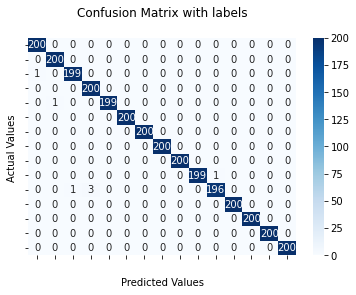

In [27]:
cf_matrix5 = confusion_matrix(y_test5, y_pred5)

ax5 = sns.heatmap(cf_matrix5, annot=True, fmt='g', cmap='Blues')

ax5.set_title('Confusion Matrix with labels\n');
ax5.set_xlabel('\nPredicted Values')
ax5.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax5.xaxis.set_ticklabels(labels, rotation=45)
ax5.yaxis.set_ticklabels(labels, rotation=45)

## Display the visualization of the Confusion Matrix.
plt.show()

In [28]:
print(train_generator2.class_indices)
print()
print(classification_report(y_test5, y_pred5))

{'Bean': 0, 'Bitter_Gourd': 1, 'Bottle_Gourd': 2, 'Brinjal': 3, 'Broccoli': 4, 'Cabbage': 5, 'Capsicum': 6, 'Carrot': 7, 'Cauliflower': 8, 'Cucumber': 9, 'Papaya': 10, 'Potato': 11, 'Pumpkin': 12, 'Radish': 13, 'Tomato': 14}

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       1.00      1.00      1.00       200
           2       0.99      0.99      0.99       200
           3       0.99      1.00      0.99       200
           4       1.00      0.99      1.00       200
           5       1.00      1.00      1.00       200
           6       1.00      1.00      1.00       200
           7       1.00      1.00      1.00       200
           8       1.00      1.00      1.00       200
           9       1.00      0.99      1.00       200
          10       0.99      0.98      0.99       200
          11       1.00      1.00      1.00       200
          12       1.00      1.00      1.00       200
          13     

In [31]:
export_dir3 = './SaveModel3'
tf.saved_model.save(model5, export_dir3)

INFO:tensorflow:Assets written to: ./SaveModel3\assets


In [32]:
# Convert the model.
converte3 = tf.lite.TFLiteConverter.from_saved_model(export_dir3)
tflite_mode3 = converte3.convert()


In [34]:
import pathlib
tflite_model_file3 = pathlib.Path('model3.tflite')
tflite_model_file3.write_bytes(tflite_mode3)

28966276

[[2.0573708e-07 3.5977848e-07 1.7815974e-08 2.9476873e-06 1.6216718e-07
  6.0021039e-06 1.7858407e-07 9.1294282e-07 5.6513937e-07 1.0180073e-05
  3.7865749e-07 4.9545980e-07 9.9997687e-01 4.8649247e-07 2.5967753e-07]]
Pumpkin


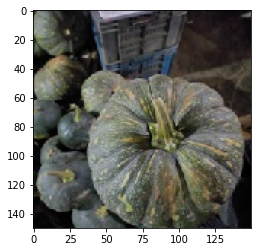

In [30]:
# Mencoba prediksi
# from google.colab import files
from keras.preprocessing import image
 
uploaded = './dt_vegetables/test/Pumpkin/1085.jpg'
 
img = image.load_img(uploaded, target_size=(150,150))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
classes = model5.predict(images, batch_size=100) # the value is not always 1 and 0 because of probabilities
predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities
print(classes)

if predicted_class_indices == 0:
  print('Bean')
elif predicted_class_indices == 1:
  print('Bitter_Gourd')
elif predicted_class_indices == 2:
  print('Bottle_Gourd')
elif predicted_class_indices == 3:
  print('Brinjal')
elif predicted_class_indices == 4:
  print('Broccoli')
# elif predicted_class_indices == 4:
#   print('kangkung')
elif predicted_class_indices == 5:
  print('Cabbage')
elif predicted_class_indices == 6:
  print('Capsicum')
elif predicted_class_indices == 7:
  print('Carrot')
elif predicted_class_indices == 8:
  print('Cauliflower')
elif predicted_class_indices ==  9:
  print('Cucumber')
elif predicted_class_indices == 10:
  print('Papaya')
elif predicted_class_indices == 11:
  print('Potato')
elif predicted_class_indices == 12:
  print('Pumpkin')
elif predicted_class_indices == 13:
  print('Radish')
elif predicted_class_indices == 14:
  print('Tomato')
else:
  print('???')